<a href="https://colab.research.google.com/github/CuongLeManh02/Learning-content/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Database/Face/

/content/drive/MyDrive/Colab Notebooks/Database/Face


In [4]:
train_img=('/content/drive/MyDrive/Colab Notebooks/Database/Face/Train')

In [5]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [21]:
train_face= train_dg.flow_from_directory(train_img,target_size=(150,150),class_mode='categorical')

Found 180 images belonging to 3 classes.


In [16]:
x_train,y_train=next(train_face)

In [13]:
x_train.shape

(32, 100, 100, 3)

In [14]:
y_train.shape

(32, 3)

In [53]:
label=['Thoai','Minh','Cuong']

In [22]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 128)     

In [24]:
model.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_face,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
6/6 [==============================] - 16s 3s/step - loss: 0.8217 - accuracy: 0.7167
Epoch 2/100
6/6 [==============================] - 15s 2s/step - loss: 0.3557 - accuracy: 0.8556
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 0.2196 - accuracy: 0.9056
Epoch 4/100
6/6 [==============================] - 15s 2s/step - loss: 0.0846 - accuracy: 0.9778
Epoch 5/100
6/6 [==============================] - 15s 2s/step - loss: 0.0710 - accuracy: 0.9778
Epoch 6/100
6/6 [==============================] - 15s 3s/step - loss: 0.1129 - accuracy: 0.9556
Epoch 7/100
6/6 [==============================] - 15s 3s/step - loss: 0.0429 - accuracy: 0.9889
Epoch 8/100
6/6 [==============================] - 15s 2s/step - loss: 0.0361 - accuracy: 0.9889
Epoch 9/100
6/6 [==============================] - 15s 3s/step - loss: 0.0104 - accuracy: 1.0000
Epoch 10/100
6/6 [==============================] - 15s 2s/step - loss: 0.0053 - accuracy: 1.0000
Epoch 11/100
6/6 [===========

In [25]:
model.save('Face Recognition.h5')

In [26]:
model_Face=load_model('Face Recognition.h5')

In [46]:
metric = model.evaluate(train_face,verbose=2)
print('Train Loss:',metric[0])
print('Train Accuracy:',metric[1])

6/6 - 16s - loss: 3.6226e-07 - accuracy: 1.0000 - 16s/epoch - 3s/step
Train Loss: 3.622624547006126e-07
Train Accuracy: 1.0


1/1 [==============================] - 0s 15ms/step
[[1.2149358e-01 4.3833707e-06 8.7850207e-01]]
1/1 [==============================] - 0s 14ms/step
This is: Cuong


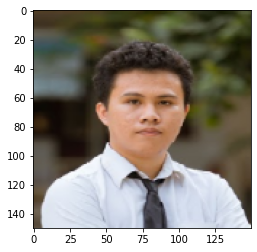

In [58]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Face/Test1/unknown.png',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,150,150,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 17ms/step
[[3.7994853e-15 1.0000000e+00 2.3292131e-17]]
1/1 [==============================] - 0s 13ms/step
This is: Minh


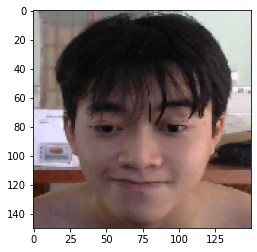

In [60]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Face/Test1/5.PNG',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,150,150,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 16ms/step
[[1.00000000e+00 5.63495478e-14 1.08791125e-14]]
1/1 [==============================] - 0s 16ms/step
This is: Thoai


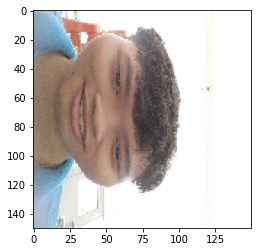

In [61]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Face/Test1/4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,150,150,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])